> DUPLICATE THIS COLAB TO START WORKING ON IT. Using File > Save a copy to drive.

# Week 2: Part 2: Classification modeling

This project will focus on developing classification models. Before working on this task, you should complete the part 1 notebook. You should also review the course pages on ML system design and project planning. 

In this notebook, we continue working through our ML business task from Week 1, and then explore classifiation further on a benchmark dataset. The earning goals for this homework include:
* Learn basic modeling techniques for ML classification tasks
* Practice build-measure-learn iterative ML development approaches
* Develop ML models for classification using the same scikit packages you might use to prototype or deploy production systems
* Evaluate and debug classification tasks for 2-class and multi-class problems. Metrics and debugging tools are the central "lens" for understanding performance. 

### Instructions

1. We provide starter code and data to give your work a common starting point and structure. You must keep function signatures unchanged to support later usage and to ensure your project is graded successfully.
2. Read through the document and starting code before beginning your work. Understand the overall structure and goals of the project to ensure your implementation is efficient.  
3. If you want a deeper introduction to any of the math/theory topics discussed, there are links in our explanations and course pages. These are optional.
4. Tasks marked _optional_ are intended to provide advanced ML engineering or modeling challenges. You may skip or attempt these tasks as you like.


# Dependencies

Let's start by importing all the necessary libraries that we'll need throughout the project:

In [ ]:
import pandas as pd
import numpy as np
from typing import Tuple
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, ConfusionMatrixDisplay
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# from sklearn.metrics import 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 5]

Next, we'll fix the random seed for numpy so we produce consistent results that can be easily discussed.

In [ ]:
# Fix the random seed so that we get consistent results
np.random.seed(0)

# Revisiting customer revenue prediction

Let's recall our business scenario from week 1. We delivered a regression model within our target metric range that predicts revenue values for customer accounts. 

After monitoring predictions from this model for a while, our customer/sales teams report that the model is indeed fairly accurate in predicting revenue values for customers! Unfortunately, the predicted revenue values aren't very _actionable_. The model is accurate on average, but often makes mistakes on larger or growing accounts -- exactly the type we might want to nurture! 

To make our ML predictions more actionable for our customer teams, we can _re-formulate_ the ML task. This re-defines what function we attempt to approximate $f_\theta(x) \rightarrow y$. 

Instead of regression over all accounts, our customer teams indicate they are most interested in a binary outcome $y$ of whether an account will be _large_ (defined by a revenue threshold) in the next cycle. This binary outcome allows efforts to focus on larger, growing, and at-risk accounts, rather than prioritizing accurate predictions over all accounts' average revenue. 

To execute on this request, let's establish an MVP classifier system by thresholding our output data, building an initial model, and reviewing some classification metrics. From there, we will iteratively try to improve the system.

## Establishing a baseline end-to-end experiment (MVP)

### Data loading 

We store the dataset on GDrive. This code downloads the dataset to your colab instance, then loads several matrices in a .npz file

In [ ]:
# download dataset from public GDrive
!gdown --id 1o_duTLOfVaDHBWgMcq-ziywUJKWd-2WL

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1o_duTLOfVaDHBWgMcq-ziywUJKWd-2WL
To: /content/proj_1_sales_dataset.npz
100% 135k/135k [00:00<00:00, 49.7MB/s]


In [ ]:
with np.load('proj_1_sales_dataset.npz') as npdata:
  X_train = npdata['X_train']
  y_train = npdata['y_train']
  X_dev = npdata['X_dev']
  y_dev = npdata['y_dev']

In [ ]:
print(npdata.files)

['X_train', 'X_dev', 'y_train', 'y_dev']


### Binarizing the output variable $y$

For the sales and customer teams, we've chosen to create a binary outcome to indicate "high revenue account" by applying a simple threshold to the current revenue values.

In [ ]:
# Create 0/1 labels by selecting y's above a threshold as positive class (1)
bin_threshold = 0.2
y_dev_bin = (y_dev > bin_threshold).astype(np.float)
y_train_bin = (y_train > bin_threshold).astype(np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [ ]:
# Show label distribution for train and dev sets
print("Training set positive class: %i / %i  " % (np.count_nonzero(y_train_bin), y_train_bin.shape[0]))
print("Dev set positive class: %i / %i  " % (np.count_nonzero(y_dev_bin), y_dev_bin.shape[0]))

Training set positive class: 327 / 1000  
Dev set positive class: 73 / 200  


### Evaluation metric selection

Following common development practices for a binary classification task, we will evaluate accuracy, F1, and precision/recall. This gives us several lenses to check performance on a binary task. 

You may use `sklearn.metrics` functions to compute specific functions or even plot precision/recall curves. 

### Task: Build and evaluate simple baselines


Predict the majority class (negative/0) then report its dev set accuracy and show a confusion matrix.

In [ ]:
#############################
#### YOUR CODE GOES HERE ####


def output_confusion_matrix(descripton, y, y_hat):
  print(descripton)
  print('[[TN FP]]\n [FN TP]]')
  print(confusion_matrix(y, y_hat))

y_dev_bin_neg = np.zeros(y_dev_bin.shape)

print("Accuracy: %.2f" % (accuracy_score(y_dev_bin, y_dev_bin_neg)))
output_confusion_matrix('Majority class (negative)', y_dev_bin, y_dev_bin_neg)

############################# 

Accuracy: 0.64
Majority class (negative)
[[TN FP]]
 [FN TP]]
[[127   0]
 [ 73   0]]


## Iterative model development (Build-Measure-Learn)

We have now loaded the dataset and performed some basic data checks. This data will be the input for our iterative development process. Let's get started!

The steps for iterative hypothesis-driven modeling include:
1. Build and evaluate a first model on the data.
2. Diagnose next steps for how to improve model.
3. Propose hypothesis for how to improve model and iterate!

### Logistic Regression baseline

Logistic regression is one of the most widely applied classification models. Analogous to linear regression, this model has robust, easy-to-understand assumptions and model fitting guarantees. In fact, some of the most advanced ML systems in the world place simple logistic regression classifiers on top of massive deep learning networks to obtain world-class results!

Let's establish a first baseline by fitting a logistic regression classifier to our dataset.

#### **Task: Build and evaluate a logistic regression model**

Fit a `LogisticRegression` model on the training set. For the training and dev sets, report the following metrics: Accuracy, precision, recall, F1, and the confusion matrix.

In [ ]:
## initialize empty model
rev_lr = LogisticRegression()

#############################
#### YOUR CODE GOES HERE ####

def output_metrics(source, model_name, ds_name, y, y_hat, avg_type='binary'):
  print("[%6s] %6s | %6s dataset: acc: %.2f prec: %.2f recall: %.2f f1: %.2f" \
        % (source, model_name, ds_name, accuracy_score(y, y_hat), \
           precision_score(y, y_hat, average=avg_type), \
           recall_score(y, y_hat, average=avg_type), \
           f1_score(y, y_hat, average=avg_type)))

def output_train_dev_metrics(source, model_name, y_train, y_train_hat, y_dev, y_dev_hat):
  output_metrics(source, model_name, 'train', y_train, y_train_hat)
  output_metrics(source, model_name, 'dev', y_dev, y_dev_hat)
  output_confusion_matrix('Train ' + model_name, y_train_bin, train_pred_y_lr)
  output_confusion_matrix('Dev   ' + model_name, y_dev_bin, dev_pred_y_lr)

rev_lr.fit(X_train, y_train_bin)
train_pred_y_lr = rev_lr.predict(X_train)
dev_pred_y_lr = rev_lr.predict(X_dev)

output_train_dev_metrics('bin', 'logreg', y_train_bin, train_pred_y_lr, y_dev_bin, dev_pred_y_lr)

############################# 

[   bin] logreg |  train dataset: acc: 0.90 prec: 0.86 recall: 0.83 f1: 0.84
[   bin] logreg |    dev dataset: acc: 0.89 prec: 0.95 recall: 0.74 f1: 0.83
Train logreg
[[TN FP]]
 [FN TP]]
[[630  43]
 [ 57 270]]
Dev   logreg
[[TN FP]]
 [FN TP]]
[[124   3]
 [ 19  54]]


One benefit of the simplicity of logistic regressions is that it's fairly easy to understand model coefficients ($\theta$). Recall logistic regression is a log-linear model of the form:

$f_\theta(x) = \sigma(\theta_1 x_1 + \theta_2 x_2 + ...)$

We can look at the internal structure of the fit model to see these weights:

In [ ]:
rev_lr.coef_

array([[-0.20998567,  0.12972135, -0.46845581,  0.42576833,  0.0029598 ,
         1.63819998, -0.59191262, -0.73977692,  1.49195392, -0.74756891,
        -0.5439476 ,  0.2800742 , -2.49696517]])

Note that we have a small set of features in this model, allowing us to visually inspect the model weights/coefficients. In larger models, we might visualize these weights by creating a scatter plot or sorting features by squared/absolute weight values. 

By looking at the model weights, we can understand some of the predictive importance of each feature. In our current model, we can see that most of the weights $\theta$ are non-zero. This suggests these features are all used to make predictions in the final model.

Be careful about interpreting model values. This requires a bit of extra stats knowledge relative to what we cover in this course. If you want to use classifiers with interpretable models, familiarize yourself with some of the statistical fundamentals first.

Here are some deeper resources on the topic if you'd like to learn more:
* [Regression analysis for the social sciences](https://www.routledge.com/Regression-Analysis-for-the-Social-Sciences/Gordon/p/book/9781138812512). Rachel Gordon. 2015.
* [Logistic Regression in-depth](https://cfss.uchicago.edu/notes/logistic-regression/). University of Chicago, Computing for the Social Sciences. 2022.
* [Elements of Statistical Learning](https://hastie.su.domains/Papers/ESLII.pdf). Chp 4.  Hastie, Tibshirani, & Friedman. 2008. 
* CS229 supervised learning [lecture notes](http://cs229.stanford.edu/notes2021fall/cs229-notes1.pdf) and [videos](https://www.youtube.com/playlist?list=PLoROMvodv4rNH7qL6-efu_q2_bPuy0adh)

### Improving with higher variance / more complex models

With the baseline model and metrics established, we can try to build models that achieve better dev set performance.

When we examine our logistic baseline model's performance, we observe training and test set F1 and accuracies that are similar, and less than perfect. Based on these observations, it's possible the logistic model is _high bias_ and does not have enough parameters/capacity to fit the training data.

Thus, we conclude we should try higher variance models. Let's use some of the common nonlinear models available in scikit to try nonlinear classification approaches. You'll notice that many models for nonlinear regression have close analogues for classification.

#### **Task: Try to improve performance with a nonlinear classifier**

We provide stubs for several nonlinear models to try. If you want to build intuition about any of these models, you can review the [sklearn documentation](https://scikit-learn.org/stable/supervised_learning.html). Later in this notebook, we will introduce the support vector machine ([SVM](https://en.wikipedia.org/wiki/Support-vector_machine)), but you are free to experiment with any classification method you'd like in order to improve dev set performance.

Note that some of the nonlinear methods here, such as nearest neighbors and decision trees, have similar regression models. Indeed, most choices for the model can be adapted to both classification and regression problems and a range of loss functions.

Below, you can experiment with different models by adjusting which `rev_kn` option is uncommnented:

In [ ]:
## initialize empty model
# rev_kn = KNeighborsClassifier(n_neighbors=4)
# rev_kn = DecisionTreeClassifier(max_leaf_nodes=8)
rev_kn = SVC(kernel='rbf')
#############################
#### YOUR CODE GOES HERE ####
rev_kn.fit(X_train, y_train_bin)
train_pred_y_kn = rev_kn.predict(X_train)
dev_pred_y_kn = rev_kn.predict(X_dev)

output_train_dev_metrics('bin', 'kn', y_train_bin, train_pred_y_kn, y_dev_bin, dev_pred_y_kn)

############################# 

[   bin]     kn |  train dataset: acc: 0.92 prec: 0.93 recall: 0.83 f1: 0.88
[   bin]     kn |    dev dataset: acc: 0.86 prec: 0.92 recall: 0.67 f1: 0.78
Train kn
[[TN FP]]
 [FN TP]]
[[630  43]
 [ 57 270]]
Dev   kn
[[TN FP]]
 [FN TP]]
[[124   3]
 [ 19  54]]


After exploring the above example, we find that nonlinear models don't perform much better on the training or test sets.

We can propose a hypothesis based on this observation: Perhaps our linear and nonlinear models perform about the same on the dev set because our dataset and ML problem formulation contain _irreducible error_. This means that, given the inputs $x$, there is some true level of uncertainty or unobserved information. This uncertainty introduces a limit to which we can approximate $f(x) \rightarrow y$. 

Let's perform some additional sanity checks on our ML approach to determine if our dataset or problem formulation might contain irreducible errors:

### Additional modeling checks

Let's perform some additional diagnostic checks to better understand our classifier performance on this task.

#### Precision-Recall curves

To better understand the relative performance of our linear and nonlinear models, we can use a precision/recall curve. This plot shows the precision-recall tradeoff for all possible _operating points_ (thresholds) for our model. Alternatively, this plot shows the range of _choices_ available to us to deploy a production model with precision/recall characteristics that best suit our product setting. For in-depth readings, check out this [tutorial blog post](https://medium.com/@douglaspsteen/precision-recall-curves-d32e5b290248) or [longer tutorial](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/).

Here, we display a precision/recall  curve plot for the linear model. You can also add your best nonlinear models so far:

Text(0.5, 1.0, '2-class Precision-Recall curve')

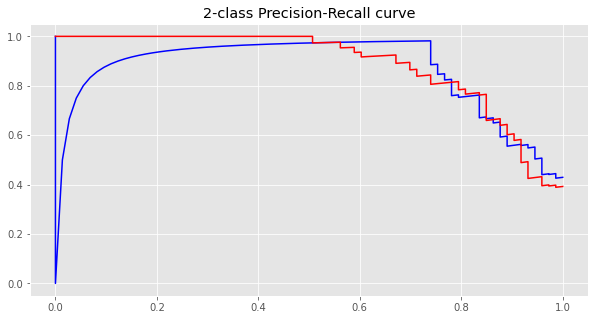

In [ ]:
precision, recall, _ = precision_recall_curve(y_dev_bin, rev_lr.decision_function(X_dev))
plt.plot(recall, precision, 'b-')
########## add your model to the plot
#### YOUR CODE GOES HERE ####
precision_kn, recall_kn, _ = precision_recall_curve(y_dev_bin, rev_kn.decision_function(X_dev))
plt.plot(recall_kn, precision_kn, 'r')
#########
plt.title("2-class Precision-Recall curve")

In our sales setting, we prefer high recall because we'd like to catch all accounts that *could* be large accounts next year, and we're willing to allocate some extra customer service time in cases where the model guesses incorrectly (i.e. false positives). 

**Question**: From a practical perspective, do you see much difference in linear vs nonlinear dev set performance around 80% recall? What did you check to make this determination?

===== (Write your answer here) =====

Based on the precision recall curve graph, the linear and non-linear models perform similarly around the 80% recall mark, with the non-linear model getting slightly higher precision at that point. Over all, they are very similar after around 75% recall.

#### **Task: Overfit a small training set**

Fit a nonlinear model on just 100 examples from the training set. Ensure you can achieve 100% accuracy with this small training set. This _overfit test_ ensures your modeling code can achieve low/no error and there are no bugs in your overall task setup. Report training and dev set accuracy with this reduced training set.

In [ ]:
#############################
#### YOUR CODE GOES HERE ####
X_train_100 = np.resize(X_train, (100, 13))
y_train_100 = np.resize(y_train_bin, (100))
rev_kn_100 = DecisionTreeClassifier(max_leaf_nodes=8)
rev_kn_100.fit(X_train_100, y_train_100)

train_pred_y_kn_100 = rev_kn_100.predict(X_train_100)
dev_pred_y_kn_100 = rev_kn_100.predict(X_dev)

output_train_dev_metrics('bin100', 'dt8', y_train_100, train_pred_y_kn_100, y_dev_bin, dev_pred_y_kn_100)

############################# 

[bin100]    dt8 |  train dataset: acc: 1.00 prec: 1.00 recall: 1.00 f1: 1.00
[bin100]    dt8 |    dev dataset: acc: 0.81 prec: 0.84 recall: 0.58 f1: 0.68
Train dt8
[[TN FP]]
 [FN TP]]
[[630  43]
 [ 57 270]]
Dev   dt8
[[TN FP]]
 [FN TP]]
[[124   3]
 [ 19  54]]


If you're able to overfit a small training set, we can conclude the data and modeling code is reasonable. Next, we'll see if our best models are capturing useful information that generalizes to our development set.

#### **Task: Train with ablated features**

To understand performance in a different way, we will use _feature ablations_. You can see a simple case of an [ablation study](https://twitter.com/fchollet/status/1012721582148550662?lang=en), as it is an important tool when building ML systems in industry. Ablation refers to removing some of the features from our dataset to assess model performance on an alternative choice for $x$. We expect the resulting model to perform a bit worse, which provides evidence that our original full set of features $x$ is indeed useful for this task (since removing some features harms performance). This decrease in performance also demonstrates that our modeling code is _responsive_ to changes in the dataset. 

Now, fit a model using only the first 5 features in the input vector $x$. Report the training and dev set performance using any model you choose:

In [ ]:
#############################
#### YOUR CODE GOES HERE ####

X_train_ablat = np.resize(X_train, (X_train.shape[0], 5))
X_dev_ablat = np.resize(X_dev, (X_dev.shape[0], 5))
rev_kn_ablat = DecisionTreeClassifier(max_leaf_nodes=8)
rev_kn_ablat.fit(X_train_ablat, y_train_bin)

train_pred_y_kn_ablat = rev_kn_ablat.predict(X_train_ablat)
dev_pred_y_kn_ablat = rev_kn_ablat.predict(X_dev_ablat)

output_train_dev_metrics('ablated', 'dt', y_train_bin, train_pred_y_kn_ablat, y_dev_bin, dev_pred_y_kn_ablat)

############################# 

[ablated]     dt |  train dataset: acc: 0.70 prec: 0.74 recall: 0.11 f1: 0.20
[ablated]     dt |    dev dataset: acc: 0.61 prec: 0.25 recall: 0.03 f1: 0.05
Train dt
[[TN FP]]
 [FN TP]]
[[630  43]
 [ 57 270]]
Dev   dt
[[TN FP]]
 [FN TP]]
[[124   3]
 [ 19  54]]


How does your model with reduced features compare to the same class of model trained on the full feature set?  We hope you found that performance is a bit worse when the feature set is reduced but still better than random guessing. This check helps ensure our models are fitting meaningful signals in the data, even though our best performance isn't as high as we hope.

#### Comparison to human performance

A good reference point for an ML system can be evaluating human performance when a human trained for the task observes the same inputs $x$ and attempts to approximate the same outcome $y$. This certainly does not apply to all ML tasks -- there are many cases where humans cannot easily understand/observe an input vector $x$, and in some cases, humans have too much context about the world outside of $x$ to provide a fair comparison.

Our Snailsforce customer teams have provided a comparison of their sales analysts' predictions. We know that our models easily outperform humans on this task -- which is unsurprising, given the counter-intuitive nature of so many product usage and customer signals. While this is good for the models, we can't use human performance in a meaningful way to debug our current modeling situation.

### Classification modeling conclusions

We've now verified that our modeling techniques perform reasonably well for this dataset and are responsive to dataset changes. Our model has performed reasonably well on the classification task formulated for this iteration of the product. 

In this case, we have enough evidence to conclude this model is _good enough_. We have evaluated the model on held out data, we can't do much to improve results beyond the current models, and we've verified that it's likely dataset noise / uncertainty that is causing our dev set performance to be less than 95% accuracy. 

Based on this, we can work with the team to get this first model into production. We would also want to work with the team to understand what factors lead to model mistakes on new data, and whether new input features in $x$ could help explain away some of the irreducible error we suspect in the dataset at present.

Congratulations on delivering another iteration of an ML modeling task in context! Let's dig deeper into classification using a benchmark task.

# Multi-class image classification: Fashion MNIST

Let's dig deeper into multi-class classification with advanced models. For a more challenging problem, we will use a benchmark task from ML research. 

The Fashion MNIST dataset contains 70,000 images from 10 categories of clothing item. The task is to correctly categorize each image. Note that the images are grayscale and quite small (28x28 pixels)

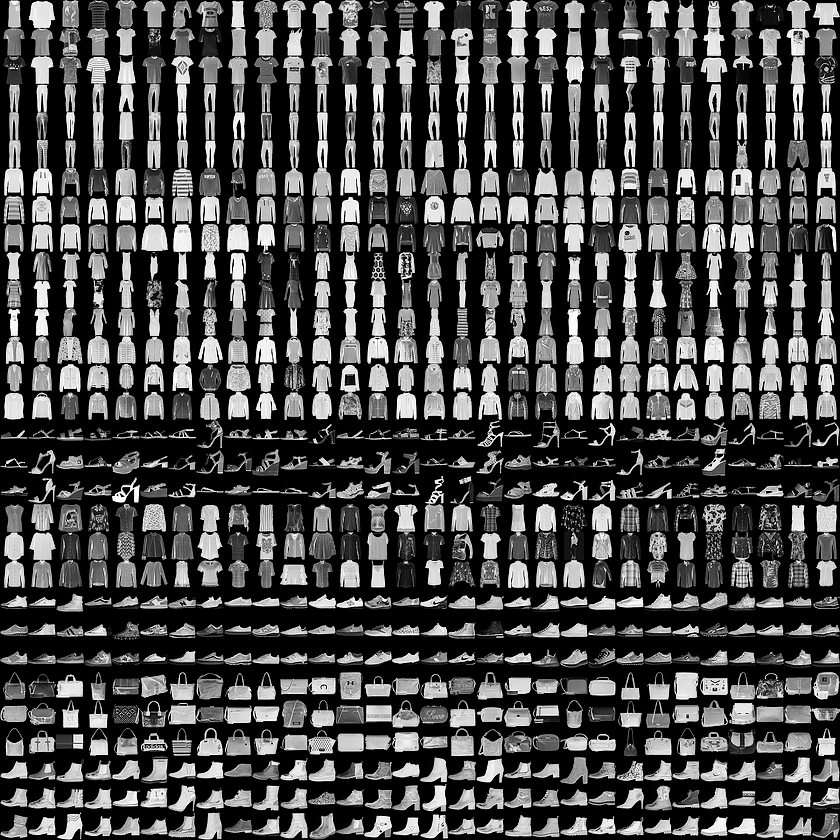

## Problem formulation

We've specified the dataset, which has 28x28 grayscale images as inputs and ten possible categories as outputs. To frame our work in the context of ML system design, let's quickly fill in the rest of a possible problem formulation for this ML task. _Before completing this section you should review this week's course pages on ML system design and planning._

**Question**: How would you formally define $x$, $y$ and the function to approximate $f(x) \rightarrow y$ for this dataset?

===== (Write your answer here) =====

x is the set composed of vectors representing the grayscale pixels contained by each image.

y is the 10 categories.

**Question**: Imagine an expanded version of this task which can categorize high resolution color images into different clothing categories. How might such an ML model be integrated into a product or website to add value in a way that accounts for the limitations of ML? What business/product metrics would you use to ultimately evaluate the impact of ML in your product of choice?

===== (Write your answer here) =====

It could be used to automatically classify products posted by users on websites like Etsy in order to improve searching or recommendations for products of a similar type. Could track over all sales, or number of product pages viewed by users when the recommendations are present.

## Data preparation

We'll start by preparing the data for use in our model.
If downloading the dataset using `gdown` produces an error, uncomment the `wget` command and use that to download it instead.

In [ ]:
# download dataset from public GDrive
!gdown --id 1l8J6uXSqBpaO4HOj4LDjywSizqs1n1A9

# If the command above doesn't run, uncomment the wget command
# below to use it instead:
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1l8J6uXSqBpaO4HOj4LDjywSizqs1n1A9' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1l8J6uXSqBpaO4HOj4LDjywSizqs1n1A9" -O fashion-mnist_train.csv.zip && rm -rf /tmp/cookies.txt

!gdown --id 1mferTKDlzBoXdHSreUhwlkP6VqJptCK-

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1l8J6uXSqBpaO4HOj4LDjywSizqs1n1A9
To: /content/fashion-mnist_train.csv.zip
100% 35.2M/35.2M [00:00<00:00, 48.0MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1mferTKDlzBoXdHSreUhwlkP6VqJptCK-
To: /content/fashion-mnist_test.csv.zip
100% 5.86M/5.86M [00:00<00:00, 65.9MB/s]


In [ ]:
# name of each category for outputs (y) 
fmn_categories = ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat', 
                  'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [ ]:
df = pd.read_csv('fashion-mnist_train.csv.zip',compression='zip')
# labels stored in initial column. Others are pixels
y_fmn_train = df.iloc[:, 0].to_numpy()
X_fmn_train = df.iloc[:, 1:].to_numpy()

df = pd.read_csv('fashion-mnist_test.csv.zip',compression='zip')
y_fmn_dev = df.iloc[:, 0].to_numpy()
X_fmn_dev = df.iloc[:, 1:].to_numpy()

del df

Next, we will perform a simple data standardization operation. For each pixel (i.e. input variable), subtract the mean and divide by the standard deviation:

In [ ]:
feat_means = X_fmn_train.mean(axis=0)
feat_std = X_fmn_train.std(axis=0)
# train
X_fmn_train = X_fmn_train - feat_means
X_fmn_train = X_fmn_train / (feat_std + 1e-4)
# dev. NOTE we apply the same training set derived transofrmations to dev set
X_fmn_dev = X_fmn_dev - feat_means
X_fmn_dev = X_fmn_dev / (feat_std + 1e-4)


## Establish a baseline end-to-end experiment (MVP)

Following our ML process, we next establish some baseline modeling results and define the core evaluation metrics to measure and compare model performance.

Because this dataset is intentionally balanced across all 10 classes, a simple majority guess baseline achieves only 10% accuracy. 

**Evaluation metrics**: For this task, we will use only accuracy and confusion matrices to guide development. Metrics like precision/recall extend to mult-class problems, but often directly analyzing the confusion matrix reveals more about what types of mistakes a model makes.

**Baseline model**: 
We will build a logistic regression model as a baseline:

In [ ]:
fmn_lr = LogisticRegression()
# NOTE this takes a few minutes to run. 
fmn_lr.fit(X_fmn_train, y_fmn_train) 

cur_preds = fmn_lr.predict(X_fmn_train)
print("Training set: acc: %.2f" % (accuracy_score(y_fmn_train, cur_preds)))

cur_preds = fmn_lr.predict(X_fmn_dev)
print("Dev set: acc: %.2f" % (accuracy_score(y_fmn_dev, cur_preds)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Training set: acc: 0.88
Dev set: acc: 0.85


**scikit warning**: Notice that the `.fit()` call generates a warning about lbfgs total number of iterations reached. _You should always pay attention to and understand warnings when fitting models._ Such warnings might indicate your model is not fit properly and should not be used. In this case, the warning comes from the optimzer that solves our training minimization problem. The model did not fully converge, but the teaching staff has verified the resulting model performance is very close to what would happen with more optimization time. Therefore, we can continue forward with this model performance.

**Iteration speed**: 
Wow, that was a bit slower than fitting models on our previous sales dataset! Developer iteration speed is a key aspect of ML system development. Our build-measure-learn iterative approach can't work if each iteration cycle takes too long. 

To improve iteration speed, let's see if we can do early work with a reduced training set size. We need to first check baseline performance with less training data since using less training data may affect performance. Our goal is to perform our development iterations on a smaller dataset, and then run the final experiments on the full data.

### **Task: Fit a baseline model on a subsampled training set**

Randomly select 5,000 training examples from the larger set. Fit a baseline logistic regression model and report accuracy on the dev set and the **original size** training set. You should be able to obtain slightly lower accuracies with much faster training time:

In [ ]:
fmn_lr_small = LogisticRegression()
X_fmn_train_small = np.ndarray(shape=(5000, X_fmn_train.shape[1]))
y_fmn_train_small = np.ndarray(shape=(5000), dtype=int)
#############################
#### YOUR CODE GOES HERE ####
# Build sample, retaining same distribution of categories as original data
num_cats = len(fmn_categories)
per_cat = int(5000 / num_cats)
for cat_index in range(num_cats):
  indices_by_class = []
  for i, y_fmn in enumerate(y_fmn_train):
    if y_fmn == cat_index:
      indices_by_class.append(i)
  sample_indices = np.random.choice(indices_by_class, per_cat, replace=False)
  for k, sample_index in enumerate(sample_indices):
    offset = per_cat * cat_index
    X_fmn_train_small[offset + k] = X_fmn_train[sample_index]
    y_fmn_train_small[offset + k] = y_fmn_train[sample_index]

# This approach does not retain the same distribution by category
# all_indices = np.arange(start=0, stop=X_fmn_train.shape[0], step=1, dtype=int)
# sample_indices = np.random.choice(all_indices, 5000, replace=False)
# for i, sample_index in enumerate(sample_indices):
#   X_fmn_train_small[i] = X_fmn_train[sample_index]
#   y_fmn_train_small[i] = y_fmn_train[sample_index]

fmn_lr_small = LogisticRegression()
fmn_lr_small.fit(X_fmn_train_small, y_fmn_train_small) 

cur_preds = fmn_lr_small.predict(X_fmn_train_small)
print("Small Training set: acc: %.2f" % (accuracy_score(y_fmn_train_small, cur_preds)))

cur_preds = fmn_lr_small.predict(X_fmn_train)
print("Original Training set: acc: %.2f" % (accuracy_score(y_fmn_train, cur_preds)))

cur_preds = fmn_lr_small.predict(X_fmn_dev)
print("Dev set: acc: %.2f" % (accuracy_score(y_fmn_dev, cur_preds)))

#############################

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Small Training set: acc: 0.99
Original Training set: acc: 0.82
Dev set: acc: 0.81


In [ ]:
from collections import Counter

print("Count y  orig: " + str(Counter(y_fmn_train)))
print("Count y small: " + str(Counter(y_fmn_train_small)))
print("Count y   dev: " + str(Counter(y_fmn_dev)))

# print("Predicted: " + str(Counter(fmn_lr_small.predict(X_fmn_train_small))))
# print("Predicted: " + str(fmn_lr_small.coef_))

Count y  orig: Counter({2: 6000, 9: 6000, 6: 6000, 0: 6000, 3: 6000, 4: 6000, 5: 6000, 8: 6000, 7: 6000, 1: 6000})
Count y small: Counter({0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500, 6: 500, 7: 500, 8: 500, 9: 500})
Count y   dev: Counter({0: 1000, 1: 1000, 2: 1000, 3: 1000, 8: 1000, 6: 1000, 5: 1000, 4: 1000, 7: 1000, 9: 1000})


You may now use your smaller training set for all remaining experiments for faster iteration speed.

### Multi-class confusion matrix

When working on multi-class classification tasks, it's often helpful to look at the full confusion matrix. Instead of just seeing false positives and false negatives, a multi-class confusion matrix displays class-class confusions for all pairs. This allows us to build intuitions about what class confusions are most impacting performance.

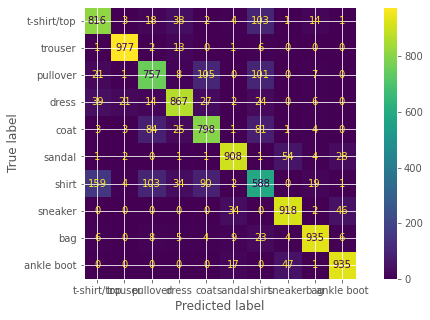

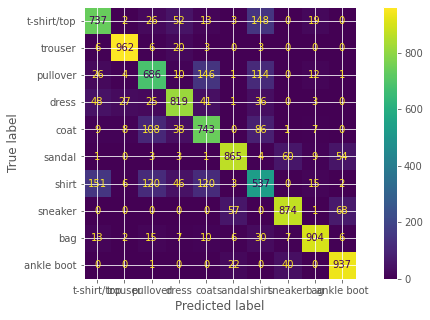

In [ ]:
ConfusionMatrixDisplay.from_estimator(fmn_lr, X_fmn_dev, y_fmn_dev, display_labels=fmn_categories)
plt.show()
ConfusionMatrixDisplay.from_estimator(fmn_lr_small, X_fmn_dev, y_fmn_dev, display_labels=fmn_categories)
plt.show()

## Advanced classification models

For now, we'll focus on trying a few different classification modeling types. This will introduce common algorithms, and allow us to try and improve performance! We'll continue to follow our build-measure-learn iteration process. Try to continually track and improve your dev set performance as you try out and tune different models.

### Support vector machines and cross validation

One of the most prominent approaches to classification is the _support vector machine_ ([SVM](https://en.wikipedia.org/wiki/Support-vector_machine)) model ([scikit SVM guide](https://scikit-learn.org/stable/modules/svm.html#svm)). 

In it's most basic form, the SVM finds a linear decision boundary, but it uses a different decision function and training loss function than the logistic regression classifier.  

The SVM formulation provides a mathematically efficient way to transform feature inputs $x$ to larger, more complex feature spaces. The _kernel_ of an SVM is a model hyperparameter which allows different types of implicit feature transforms.

Scikit makes it easy to use SVMs via the `svm.SVC` class. As our first SVM model, let's use a special case linear kernel model. This formulation scales well to larger datasets and is a good first choice for new tasks:

In [ ]:
fmn_svc = LinearSVC()

fmn_svc.fit(X_fmn_train_small, y_fmn_train_small) 

print("Dev set: acc: %.2f" % (accuracy_score(y_fmn_dev, fmn_svc.predict(X_fmn_dev))))

Dev set: acc: 0.74


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


An SVM has two central hyperparameters: the choice of kernel and the regularization parameter C. The kernel choice determines what implicit featurizer we use, and some kernels have hyperparameters of their own.

The C parameter adds a penalty for misclassifications. Larger C values correspond to more emphasis on fitting the training data perfecly and thus _less_ regularization of the model. _Note that this C parameter is the inverse of the $L_2$ regularization penalty we saw with regression models._

Rather than writing our own version, let's use scikit's built in _cross validation_ helper to search over several hyperparameter settings. To start, we can try several values of C with a linear kernel:

In [ ]:
# declare what hyperparams to search over
# now switching to kernel SVM using SVC()
search_hyperparams = [
    # {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
    # This was the best outcome, skipping to it so I can rerun more quickly
    {"kernel": ["linear"], "C": [1]},
]

fmn_gssvc = GridSearchCV(SVC(), search_hyperparams, scoring='accuracy')
fmn_gssvc.fit(X_fmn_train_small, y_fmn_train_small)

# final model used in .predict() is best parameters found in CV
print("Dev set: acc: %.2f" % (accuracy_score(y_fmn_dev, fmn_gssvc.predict(X_fmn_dev))))
print("Best: " + str(fmn_gssvc.best_estimator_))

Dev set: acc: 0.81
Best: SVC(C=1, kernel='linear')


#### **Task: SVM kernel selection using cross validation**

Now, let's use `GridSearchCV` to try several choices of kernel. You may need to adjust C differently for each kernel. Report dev set accuracy and what kernel/hyperparameters produce your best results:

In [ ]:
#############################
#### YOUR CODE GOES HERE ####
search_hyperparams = [
    # {"kernel": ["linear"], "C": [5, 20]},
    # {"kernel": ["poly"], "C": [5, 20]},
    # {"kernel": ["rbf"], "C": [1, 5, 10, 20]},
    # This was the best outcome, skipping to it so I can rerun more quickly
    {"kernel": ["rbf"], "C": [10]},
    # {"kernel": ["sigmoid"], "C": [5, 20]},
]

fmn_gssvc = GridSearchCV(SVC(), search_hyperparams, scoring='accuracy')
fmn_gssvc.fit(X_fmn_train_small, y_fmn_train_small)

print("Dev set: acc: %.2f" % (accuracy_score(y_fmn_dev, fmn_gssvc.predict(X_fmn_dev))))
print("Best: " + str(fmn_gssvc.best_estimator_))
#############################

Dev set: acc: 0.86
Best: SVC(C=10)


In [ ]:
print(fmn_gssvc.best_params_)

{'C': 10, 'kernel': 'rbf'}


### From decision trees to random forests

In our simple classification exercise, we already used [decision tree](https://en.wikipedia.org/wiki/Decision_tree_learning) classifiers. Decision trees can provide good results that are easy to interpret, as they built from simple rules that map the input feature space $x$ to outputs $y$, modeling $f(x)\rightarrow y$.

Like SVMs, decision trees can often produce good results with fairly limited tuning on new datasets. We can fit a decision tree model on fashion MNIST and obtain reasonable results, as shown below:

In [ ]:
fmn_rf = DecisionTreeClassifier()

fmn_rf.fit(X_fmn_train_small, y_fmn_train_small) 

print("Dev set: acc: %.2f" % (accuracy_score(y_fmn_dev, fmn_rf.predict(X_fmn_dev))))
print("Selected depth: %d" % (fmn_rf.tree_.max_depth))

Dev set: acc: 0.74
Selected depth: 23


#### **Task: (Optional) Decision tree tuning**

**Advanced**: For more in-depth work, familiarize yourself with some of the [APIs](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and internals of decision tree [tuning](https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680). You can then be more thoughtful about how you define a set of cross-validation search criteria to obtain the best possible decision tree. Show how you searched, along with your best model performance:

Train set: acc: 0.95
Dev set: acc: 0.75


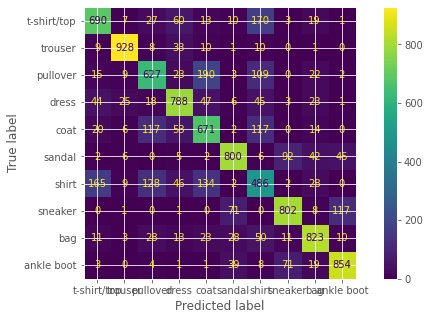

In [ ]:
#############################
#### YOUR CODE GOES HERE ####
# improve the decision tree model by trying different settings if you choose
# Trying out some of the hyperparameters suggested for reducing overfitting
fmn_rf_t = DecisionTreeClassifier(max_depth = 12, min_samples_split = 2)

fmn_rf_t.fit(X_fmn_train_small, y_fmn_train_small) 

print("Train set: acc: %.2f" % (accuracy_score(y_fmn_train_small, fmn_rf_t.predict(X_fmn_train_small))))
print("Dev set: acc: %.2f" % (accuracy_score(y_fmn_dev, fmn_rf_t.predict(X_fmn_dev))))

ConfusionMatrixDisplay.from_estimator(fmn_rf_t, X_fmn_dev, y_fmn_dev, display_labels=fmn_categories)
plt.show()

#############################

#### **Task: Random forest modeling**

We can often outperform decision trees with one simple (statistical) trick ... [_ensembling_](https://en.wikipedia.org/wiki/Ensemble_learning)! We use ensembling to build a _random forest_ which  builds many partial decision tree models to form a final voting committee classifier. The rough idea is that many partial models will outperform a single more complex model when making predictions on new data. 

This concept has solid statistical theory behind it and applies beyond just tree classifiers. In fact, the concept of ensembling leads to some [general-purpose wrappers](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) that can improve any estimator by creating a vote over differently trained models. We will go into more depth on ensembling techniques next week.

For now, try to search some of the space of random forest [hyperparameters](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) in whatever way you choose to obtain dev set performance better than your logistic regression baseline. Report your random forest model settings, as well as the accuracy of your model:

In [ ]:
#############################
#### YOUR CODE GOES HERE ####
search_hyperparams = [
    # {"max_depth": [None, 3, 5, 10], "min_samples_split": [2, 20, 40], "min_samples_leaf": [1, 10, 20], "max_features": ["sqrt", "log2"], "n_estimators": [10, 100]}
    # This was the best outcome, skipping to it so I can rerun more quickly
    {'max_features': ['sqrt']}
]
fmn_gsforest = GridSearchCV(RandomForestClassifier(), search_hyperparams, scoring='accuracy')
fmn_gsforest.fit(X_fmn_train_small, y_fmn_train_small)

print("Dev set: acc: %.2f" % (accuracy_score(y_fmn_dev, fmn_gsforest.predict(X_fmn_dev))))
print("Best: " + str(fmn_gsforest.best_estimator_))

#############################

Dev set: acc: 0.85
Best: RandomForestClassifier(max_features='sqrt')


In [ ]:
print(fmn_gsforest.best_params_)

{'max_features': 'sqrt'}


In [ ]:
print(fmn_gsforest.cv_results_.keys())
print(fmn_gsforest.cv_results_['params'])
print(fmn_gsforest.cv_results_['rank_test_score'])
# print(fmn_gsforest.cv_results_['params'][37])
print("Train set: acc: %.2f" % (accuracy_score(y_fmn_train_small, fmn_gsforest.predict(X_fmn_train_small))))

# Experimenting with setting max_depth, since training acc was maxed out
fmn_gsfr_test = RandomForestClassifier(max_depth = 14, max_features='sqrt')
fmn_gsfr_test.fit(X_fmn_train_small, y_fmn_train_small)
print("Train set: acc: %.2f" % (accuracy_score(y_fmn_train_small, fmn_gsfr_test.predict(X_fmn_train_small))))
print("Dev set: acc: %.2f" % (accuracy_score(y_fmn_dev, fmn_gsfr_test.predict(X_fmn_dev))))


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_features', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
[{'max_features': 'sqrt'}]
[1]
Train set: acc: 1.00
Train set: acc: 1.00
Dev set: acc: 0.85


## **Task: Try additional nonlinear models**

So far we've evaluated several function approximation approaches to model $f(x) \rightarrow y$ for this task. Logistic regression, SVMs, decision trees, and random forests are all just different choices for the _how_ of the function approximation task. Indeed, there are countless function approximation techniques we could choose to explore.

Now is your chance to try out some nonlinear techniques for this classification task! The metrics and baselines have already been clearly established in this notebook. Spend up to one hour iterating on different modeling techniques to achieve the best dev set performance you can. You may try any of the classification techniques we've tried so far or explore new algorithms.

Next week, we will explore specific algorithms and best practices for current state-of-the-art results on new classification tasks. You should feel comfortable trying out a range of algorithms to approximate any function. Remember, everything fits into the same overall supervised ML framework, no matter the details of the algorithm for function approximation.

**Advanced** (Optional): You can also try neural network approaches using scikit's [multi-layer perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) toolkit, or even full deep neural network approaches with [PyTorch](https://pytorch.org/) DNN models. Here's an in-depth [guide](https://github.com/LucasVandroux/Fashion-MNIST-PyTorch). 

You can explore various nonlinear techniques in the code block below. Be sure to evaluate your model's performance, and report your best performing model!

In [ ]:
fmn_nn = MLPClassifier() #.85
# fmn_nn.fit(X_fmn_train_small, y_fmn_train_small)

#############################
#### YOUR CODE GOES HERE ####
# improve models of your choice and tune as necessary 
# fmn_nn = MLPClassifier(hidden_layer_sizes=(256,256,)) #.85
# fmn_nn = MLPClassifier(hidden_layer_sizes=(28,28,)) #.83
# fmn_nn = MLPClassifier(hidden_layer_sizes=(1024,1024,)) #.84
# fmn_nn = MLPClassifier(hidden_layer_sizes=(256,256,), max_fun = 25000) #.85
# fmn_nn = MLPClassifier(solver = 'sgd') #.84
fmn_nn = MLPClassifier(solver = 'adam') #.85
# fmn_nn = MLPClassifier(solver = 'adam', hidden_layer_sizes=(256,256,)) #.85

fmn_nn.fit(X_fmn_train_small, y_fmn_train_small)



#############################

print("Train set: acc: %.2f" % (accuracy_score(y_fmn_train_small, fmn_nn.predict(X_fmn_train_small))))
print("Dev set: acc: %.2f" % (accuracy_score(y_fmn_dev, fmn_nn.predict(X_fmn_dev))))

Train set: acc: 1.00
Dev set: acc: 0.85


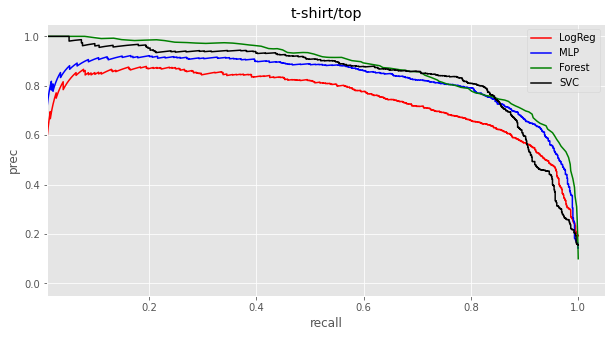

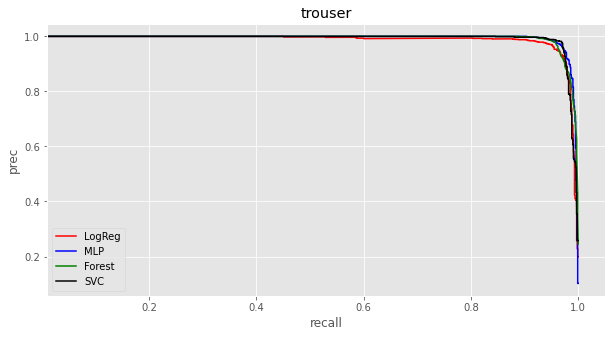

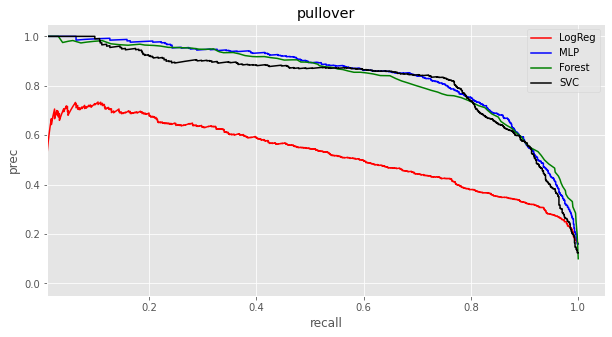

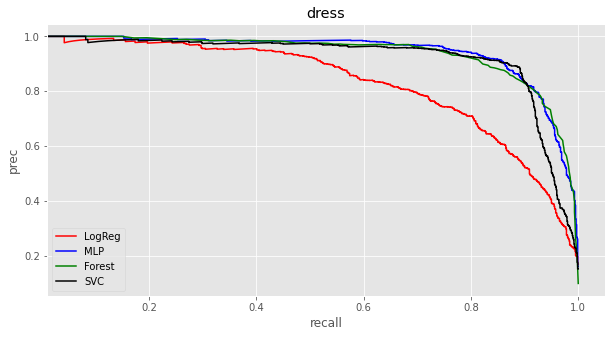

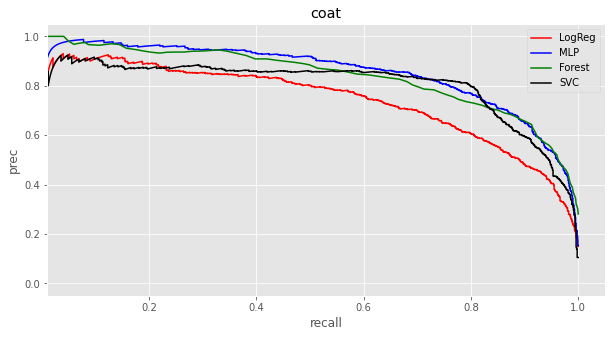

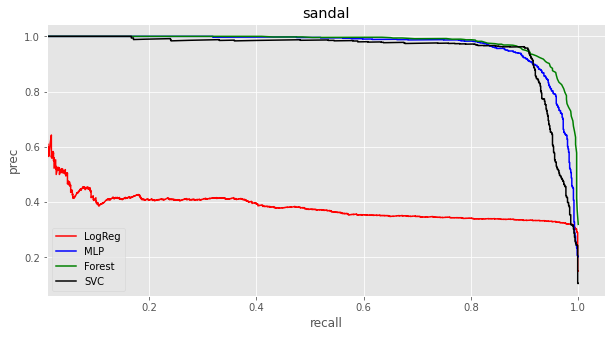

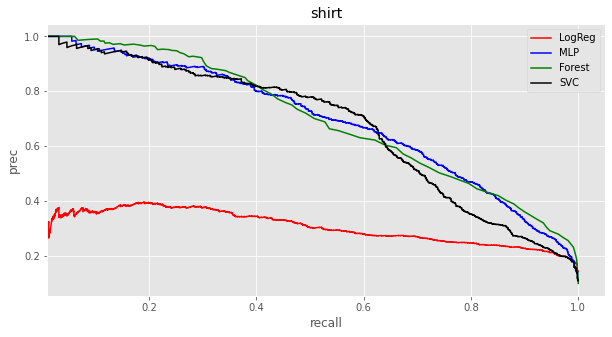

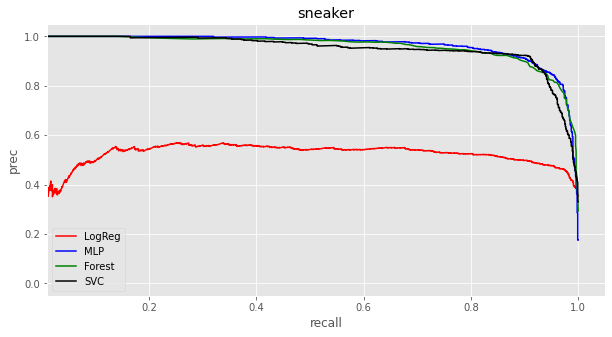

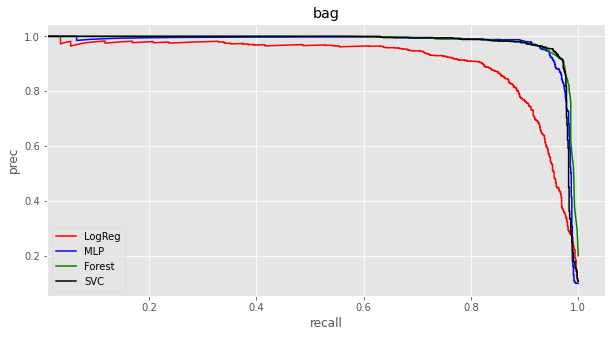

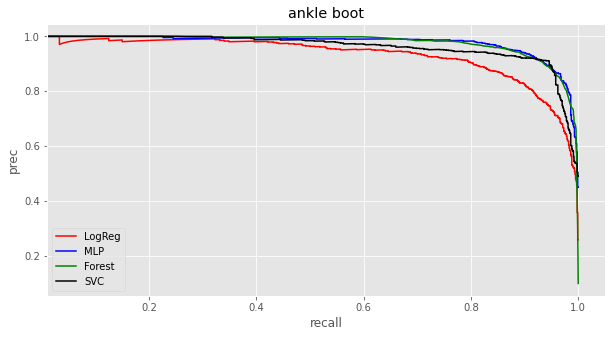

In [ ]:
y_score_lr = fmn_lr.decision_function(X_fmn_dev)
y_score_nn = fmn_nn.predict_proba(X_fmn_dev)
y_score_fr = fmn_gsforest.predict_proba(X_fmn_dev)
y_score_svc = fmn_gssvc.decision_function(X_fmn_dev)

for i in range(10):
  precision_lr, recall_lr, _ = precision_recall_curve(y_fmn_dev, y_score_lr[:, i], pos_label=i)
  precision_nn, recall_nn, _ = precision_recall_curve(y_fmn_dev, y_score_nn[:, i], pos_label=i)
  precision_fr, recall_fr, _ = precision_recall_curve(y_fmn_dev, y_score_fr[:, i], pos_label=i)
  precision_svc, recall_svc, _ = precision_recall_curve(y_fmn_dev, y_score_svc[:, i], pos_label=i)

  plt.title(fmn_categories[i])
  plt.plot(recall_lr, precision_lr, 'r', label='LogReg')
  plt.plot(recall_nn, precision_nn, 'b', label='MLP')
  plt.plot(recall_fr, precision_fr, 'g', label='Forest')
  plt.plot(recall_svc, precision_svc, 'k', label='SVC')
  plt.xlim(left=0.01)
  plt.xlabel('recall')
  plt.ylabel('prec')
  plt.legend()
  plt.show()

In [ ]:
# from sklearn.metrics import roc_curve

# for i in range(10):
#   precision_lr, recall_lr, _ = roc_curve(y_fmn_dev, y_score_lr, pos_label=i)
#   precision_nn, recall_nn, _ = roc_curve(y_fmn_dev, y_score_nn, pos_label=i)
#   precision_fr, recall_fr, _ = roc_curve(y_fmn_dev, y_score_fr, pos_label=i)

#   plt.title(fmn_categories[i])
#   plt.plot(recall_lr, precision_lr, 'r', label='LogReg')
#   plt.plot(recall_nn, precision_nn, 'b', label='MLP')
#   plt.plot(recall_fr, precision_fr, 'g', label='Forest')
#   plt.xlim(left=0.01)
#   plt.xlabel('fpr')
#   plt.ylabel('tpr')
#   plt.legend()
#   plt.show()


LogReg baseline


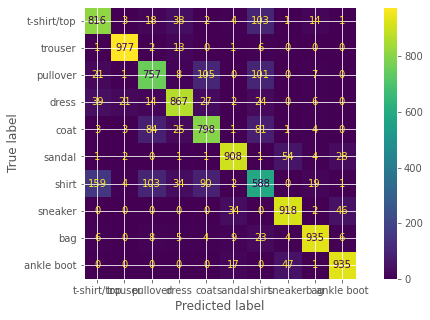

MLP


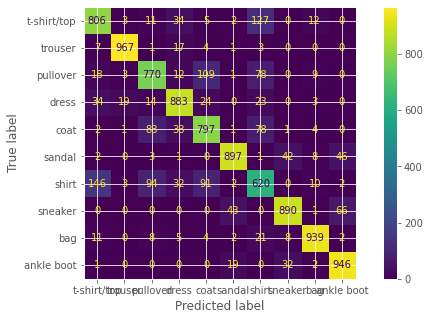

Random Forest


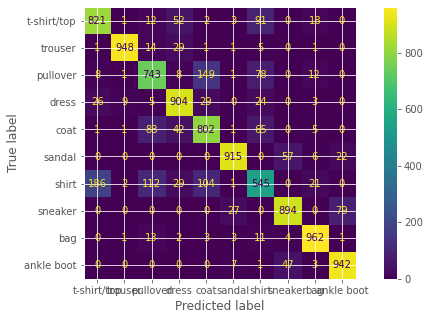

SVC


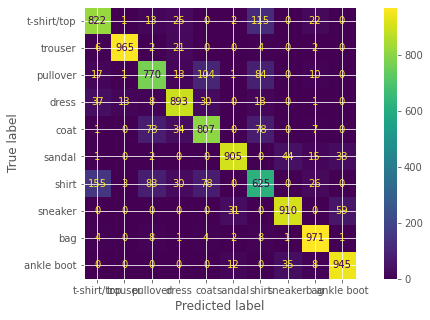

In [ ]:
print('LogReg baseline')
ConfusionMatrixDisplay.from_estimator(fmn_lr, X_fmn_dev, y_fmn_dev, display_labels=fmn_categories)
plt.show()
print('MLP')
ConfusionMatrixDisplay.from_estimator(fmn_nn, X_fmn_dev, y_fmn_dev, display_labels=fmn_categories)
plt.show()
print('Random Forest')
ConfusionMatrixDisplay.from_estimator(fmn_gsforest, X_fmn_dev, y_fmn_dev, display_labels=fmn_categories)
plt.show()
print('SVC')
ConfusionMatrixDisplay.from_estimator(fmn_gssvc, X_fmn_dev, y_fmn_dev, display_labels=fmn_categories)
plt.show()


## Error analysis

Now that you've built improved models, see if you can use any of the plotting or debugging tools discussed so far to explain differences between your best model and a baseline.

Are there comparison plots, confusion matrices, or other error comparisons you can generate to explain how your best model improves on the baseline? Does your model improve in any systematic ways?

===== (Your answer and code/plots here) =====

The SVC tends to be slightly higher precision at recall percentages in the 80s versus the other two closest performing models, Deep Forest and MLP, but then does a little worse at higher percentages. The model performance very significantly by category, but in almost all cases the more advanced models out perform the logistic regression baseline

Judging by the confusion matrixes, it looks like all the models had a hard time telling the difference between shirts and t-shirts, which seems understandable since they seem hierarchical.

Based on precision/recall curves, it seems like trouser had the highest performance across all models. The best models had a very similar TP rate for "trouser" and "bag", but the RandomForest model had 73 FPs for "bag", but only 19 for "trouser", so that may be why the precision for trouser is a bit higher.

## Domain shift: Rotated images

Take your best model, and let's try a real-world example of testing _domain shift_.

So far, we've trained and evaluated our models on the original dataset where all objects are upright. Let's create a dev set with upside down objects and check model performance:

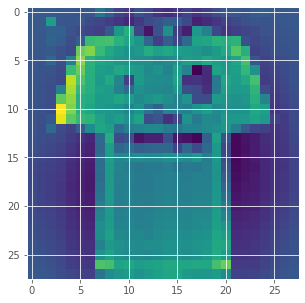

In [ ]:
# original data
plt.imshow(np.reshape(X_fmn_dev[0,:],[28,28]))

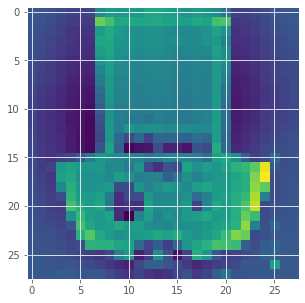

In [ ]:
# rotated data
X_fmn_flipped_dev = np.fliplr(X_fmn_dev)
plt.imshow(np.reshape(X_fmn_flipped_dev[0,:],[28,28]))

In [ ]:
# Evaluate your best model here
print("Dev set: acc: %.2f" % (accuracy_score(y_fmn_dev, fmn_nn.predict(X_fmn_flipped_dev))))

Dev set: acc: 0.25


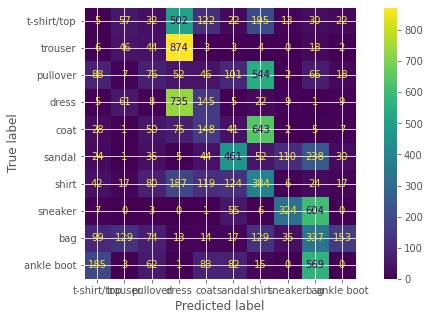

In [ ]:
ConfusionMatrixDisplay.from_estimator(fmn_nn, X_fmn_flipped_dev, y_fmn_dev,display_labels=fmn_categories)
plt.show()

Wow! Unless you anticipated this challenge and built a great model -- performance on the rotated dev set is poor. 

Here's a case where a quick comparison to a human annotator is helpful. In looking at the rotated image, we can still easily choose the correct class. Sensitivity to rotation in our dev set performance is an example of an ML model being very brittle.

The model narrowly generalizes around the training set, but we are rely on the training set to define a sufficiently broad world (in this case, rotated inputs). Some models try to solve for this by directly encoding rotational invariance for visual tasks.

This is a simple, clear case where a model makes mistakes on data because its training set contained no such data, and the model bias does not encourage "correct" generalization according to our intuitions. In this case, it's just upside down clothing images, but this same training set bias issue can lead to ML systems which under-perform for under-represented groups, make unpredictable mistakes on unseen new inputs, or make other _domain shift_ mistakes.

### **Task: Train with augmented data**

To try and compensate for anticipated variations in our test data, we can create _augmented_ training sets that include variations that we would like the model to be robust against. 

Retrain a classifier of your choice using a dataset that combines the original data with an augmentation of rotated examples:

In [ ]:
X_fmn_flipped_train = np.vstack((X_fmn_train_small, np.fliplr(X_fmn_train_small)))
y_fmn_flipped_train = np.hstack((y_fmn_train_small, y_fmn_train_small))

In [ ]:
fmn_nn_rot = None

#############################
#### YOUR CODE GOES HERE ####
# improve models of your choice and tune as necessary 
fmn_nn_rot = MLPClassifier(hidden_layer_sizes=(256,256,))
fmn_nn_rot.fit(X_fmn_flipped_train, y_fmn_flipped_train)

#############################

MLPClassifier(hidden_layer_sizes=(256, 256))

In [ ]:
# Evaluate your model
print("Dev set: acc: %.2f" % (accuracy_score(y_fmn_dev, fmn_nn_rot.predict(X_fmn_dev))))
print("Flipped dev set: acc: %.2f" % (accuracy_score(y_fmn_dev, fmn_nn_rot.predict(X_fmn_flipped_dev))))

Dev set: acc: 0.85
Flipped dev set: acc: 0.84


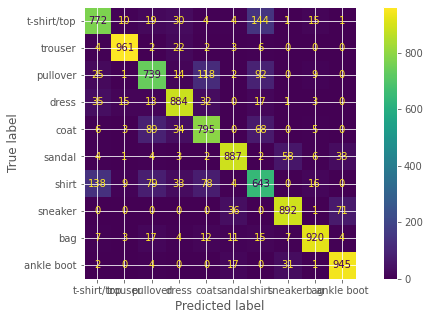

In [ ]:
# Show the confusion matrix for your classifier after augmented training
ConfusionMatrixDisplay.from_estimator(fmn_nn_rot, X_fmn_flipped_dev, y_fmn_dev,display_labels=fmn_categories)
plt.show()

Depending on your classifier choice, you should be able to obtain good performamce on both the original and flipped dev sets by training with the augmented training set.

### **Task (Optional): Handle multiple possible rotations**

You can extend your dev and training sets to include multiple rotations (say each quarter rotation of the image). Demonstrate you can train a model with augmented data to handle any of many possible test-time rotations:

In [ ]:
#############################
#### YOUR CODE GOES HERE ####
# create dev and training sets for multiple rotations
# improve models of your choice and tune as necessary 

#############################

print("Dev set: acc: %.2f" % (accuracy_score(y_fmn_dev, fmn_nn.predict(X_fmn_dev))))

Dev set: acc: 0.85


## Effect of data label noise

Next, let's simulate the impact of a common occurrence, some errors in our training data labels. We will introduce a simple function which takes a label vector and introduces random errors into a percentage of the examples. By training on these noisy labels, our models will likely have more difficulty generalizing to the input data.

In the code blocks below, we generate the noisy dataset:

In [ ]:
def label_noise(labels: np.ndarray, perc_noisy: float):
  """Create a noisy set of labels 
  Args:
    labels: 1-D array of actual values
    perc_noisy: scalar. The percentage of labels to distort

  Returns:
    label vector with perc_noisy percent of labels randomly changed  
  """
  if perc_noisy == 0:
    return labels

  new_labels = np.copy(labels)
  
  n_flp = int(np.floor(new_labels.shape[0] * perc_noisy))
  print('N labels to flip: %i' % (n_flp))
  
  # when flip happens, randomly assign label
  flipped_labels = np.random.randint(0, int((np.max(new_labels))), size=n_flp)

  # randomly flip n_flp labels
  rnd_idx = np.arange(new_labels.shape[0])
  np.random.shuffle(rnd_idx)
  rnd_idx = rnd_idx[:n_flp]

  new_labels[rnd_idx] = flipped_labels
  
  return new_labels

In [ ]:
y_fmn_train_noisy = label_noise(y_fmn_train_small, 0.01)

N labels to flip: 50


### **Task: Train and evaluate with noisy labels**

Now, fit a classification model to the `y_fmn_train_noisy` training labels that we generated above. Report the dev and training set accuracies. Comment on how much performance degrades with noisy training labels compared to no label noise:

In [ ]:
fmn_noisy_clf = None

#############################
#### YOUR CODE GOES HERE ####
# improve models of your choice and tune as necessary 
fmn_noisy_clf = MLPClassifier(hidden_layer_sizes=(256,256,))
fmn_noisy_clf.fit(X_fmn_train_small, y_fmn_train_noisy)

#############################

print("Training set: acc: %.2f" % (accuracy_score(y_fmn_train_noisy, fmn_noisy_clf.predict(X_fmn_train_small))))
print("Dev set: acc: %.2f" % (accuracy_score(y_fmn_dev, fmn_noisy_clf.predict(X_fmn_dev))))

Training set: acc: 0.99
Dev set: acc: 0.84


===== (Write your answer here) =====

Accuracy degraded by about 1-2%, which makes sense since 1% of the training data was incorrectly labeled.

### **Task: Generate a plot of dev performance as a function of label noise**

Now that you've trained a single model, create an efficient loop to train a reasonable model on a range of label distortions. We provide a baseline range and a plotting template:

In [ ]:
fmn_noisy_clf = None
label_noise_percs = [0, 0.01, 0.05, 0.075, 0.2, 0.5]
dev_acc_list = []

#############################
#### YOUR CODE GOES HERE ####
#### fill in dev_acc_list with your results for each noise setting
# improve models of your choice and tune as necessary 
for perc in label_noise_percs:
  fmn_noisy_clf = MLPClassifier(hidden_layer_sizes=(256,256,))
  y_fmn_train_noisy = label_noise(y_fmn_train_small, perc)
  fmn_noisy_clf.fit(X_fmn_train_small, y_fmn_train_noisy)
  accuracy = accuracy_score(y_fmn_dev, fmn_noisy_clf.predict(X_fmn_dev))
  dev_acc_list.append(accuracy)

#############################
dev_acc_list

N labels to flip: 50
N labels to flip: 250
N labels to flip: 375
N labels to flip: 1000
N labels to flip: 2500


[0.8542, 0.8537, 0.8358, 0.8352, 0.7814, 0.5734]

Next, let's plot the accuracy of our model as a function of label noise:

Text(0, 0.5, 'Accuracy (%)')

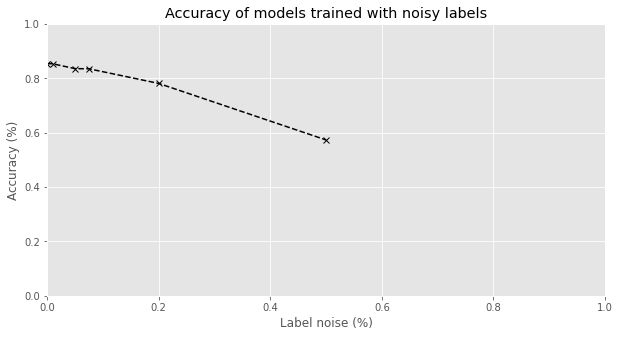

In [ ]:
plt.plot(label_noise_percs, dev_acc_list, 'kx--')
plt.ylim([0,1])
plt.xlim([0,1])
plt.title('Accuracy of models trained with noisy labels')
plt.xlabel('Label noise (%)')
plt.ylabel('Accuracy (%)')

In [ ]:
fmn_noisy_clf = None
label_noise_percs = [0, 0.01, 0.05, 0.075, 0.2, 0.5]
dev_acc_list = []

#############################
#### YOUR CODE GOES HERE ####
#### fill in dev_acc_list with your results for each noise setting
# improve models of your choice and tune as necessary 
for perc in label_noise_percs:
  fmn_noisy_clf = RandomForestClassifier(max_features='sqrt')
  y_fmn_train_noisy = label_noise(y_fmn_train_small, perc)
  fmn_noisy_clf.fit(X_fmn_train_small, y_fmn_train_noisy)
  accuracy = accuracy_score(y_fmn_dev, fmn_noisy_clf.predict(X_fmn_dev))
  dev_acc_list.append(accuracy)

#############################
dev_acc_list

N labels to flip: 50
N labels to flip: 250
N labels to flip: 375
N labels to flip: 1000
N labels to flip: 2500


[0.8444, 0.8459, 0.8459, 0.8456, 0.8367, 0.8124]

Text(0, 0.5, 'Accuracy (%)')

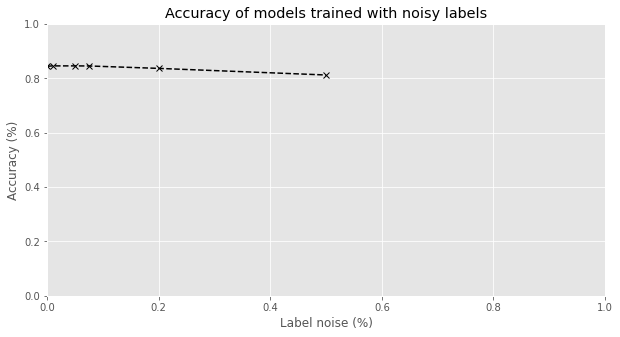

In [ ]:
plt.plot(label_noise_percs, dev_acc_list, 'kx--')
plt.ylim([0,1])
plt.xlim([0,1])
plt.title('Accuracy of models trained with noisy labels')
plt.xlabel('Label noise (%)')
plt.ylabel('Accuracy (%)')

See if you can select a classifier and tune it appropriately to retain as much performance as possible while label quality degrades. This sort of analysis can also help us understand the potential impact of noisy crowd data labeling services or other noisy labels for tasks.

Understanding the impact of label errors has a lot of practical value in modern ML systems where labels are often costly to gather and can involve crowd annotators.

For example, based on the chart above, would you advocate for a high cost data labeling solution which reduces label error from 5% to 1%? Such questions arise in practice, and data annotation can be an expensive part of ML development.

### **Task (Optional): Experiment with different data label noise distributions**

In our original `label_noise` function, we used a simple uniform random choice when a label was to be replaced with noise. In modern data annotation systems, labeling errors are often _not random_. Instead, individual annotators, particular batches of data, or data collected in certain conditions might all lead to _correlated_ labeling errors. We need to be more careful about such errors in training data as they might have specific noticeable impacts on how our system generalizes to new examples. 

Try simulating different label noise distributions -- always choosing label 0 when incorrect, always getting label 3 incorrect, mistaking label 3 for label 6, etc. Can you notice specific, different impacts on dev set performance depending on the label noise distribution?

In [ ]:
#############################
#### YOUR CODE GOES HERE ####
def label_noise_zero(labels: np.ndarray, perc_noisy: float):
  """Create a noisy set of labels 
  Args:
    labels: 1-D array of actual values
    perc_noisy: scalar. The percentage of labels to distort

  Returns:
    label vector with perc_noisy percent of labels randomly changed  
  """
  if perc_noisy == 0:
    return labels

  new_labels = np.copy(labels)
  
  n_flp = int(np.floor(new_labels.shape[0] * perc_noisy))
  print('N labels to zero: %i' % (n_flp))
  
  # when flip happens, randomly assign label
  flipped_labels = np.random.randint(0, labels.shape[0], size=n_flp)

  for i in flipped_labels:
    new_labels[i] = 0
  
  return new_labels


test_arr = np.ones(10, dtype=int)
print(test_arr)
print(label_noise_zero(test_arr, 0.2))

#############################

[1 1 1 1 1 1 1 1 1 1]
N labels to zero: 2
[1 1 1 0 1 1 1 1 1 0]


In [ ]:
label_noise_percs = [0, 0.01, 0.05, 0.075, 0.2, 0.5]
zero_acc_list = []

#############################
#### YOUR CODE GOES HERE ####
#### fill in dev_acc_list with your results for each noise setting
# improve models of your choice and tune as necessary 
for perc in label_noise_percs:
  fmn_noisy_clf = RandomForestClassifier(max_features='sqrt')
  y_fmn_train_noisy = label_noise_zero(y_fmn_train_small, perc)
  fmn_noisy_clf.fit(X_fmn_train_small, y_fmn_train_noisy)
  accuracy = accuracy_score(y_fmn_dev, fmn_noisy_clf.predict(X_fmn_dev))
  zero_acc_list.append(accuracy)

#############################
zero_acc_list

N labels to zero: 50
N labels to zero: 250
N labels to zero: 375
N labels to zero: 1000
N labels to zero: 2500


[0.8445, 0.8461, 0.8438, 0.8429, 0.8139, 0.5428]

Text(0, 0.5, 'Accuracy (%)')

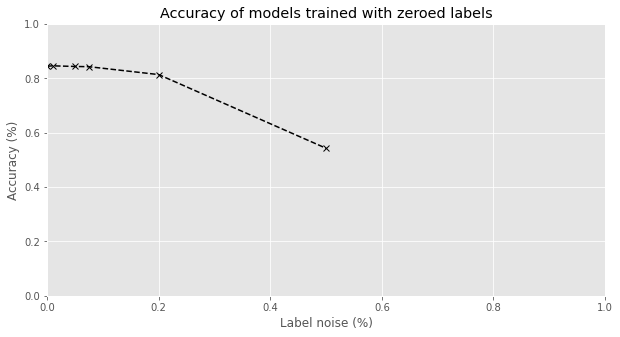

In [ ]:
plt.plot(label_noise_percs, zero_acc_list, 'kx--')
plt.ylim([0,1])
plt.xlim([0,1])
plt.title('Accuracy of models trained with zeroed labels')
plt.xlabel('Label noise (%)')
plt.ylabel('Accuracy (%)')

# Conclusion and next steps

Congratulations on completing the project! You took an iterative approach to building classification models on multiple datasets! Along the way we introduced multiple methods for classification that are simple yet powerful enough for industry use across a wide range of tasks.

We also leveraged concepts in ML project design/planning to understand how to proceed with projects. Finally, we looked at some particular tools like data augmentation, label error, and cross-validation -- all of which are part of our toolkit for creating effective solutions to each step of ML system development. 

For final results, you might want to re-run the notebook using the full fashion MNIST training set. Don't feel obligated if the time or compute resources are too much -- the main learning outcomes are unchanged.

We encourage you to review your work, try to extend or read further in areas that challenged you, and discuss with classmates!